# Titanic

Acesta este un cod pentru concursul "Titanic - Machine Learning from Disaster" de pe Kaggle.
Vom folosi KNN, ceea ce nu va produce cele mai bune rezultate pe platforma, scopul sau fiind unul educativ. :)

Importam toate librariile necesare

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

Citirea

In [ ]:
train_df = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

O sa vizualizam putin datele ca sa vedem cu ce lucram.

**Vizualizarea datelor** este primul si unul dintre cei mai importanti pasi in abordarea unei probleme de ML.

In [ ]:
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
print(train_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


De multe ori valorile "brute" nu ne spun nimic asa ca vom plota datele pentru o vizualizare mai buna.

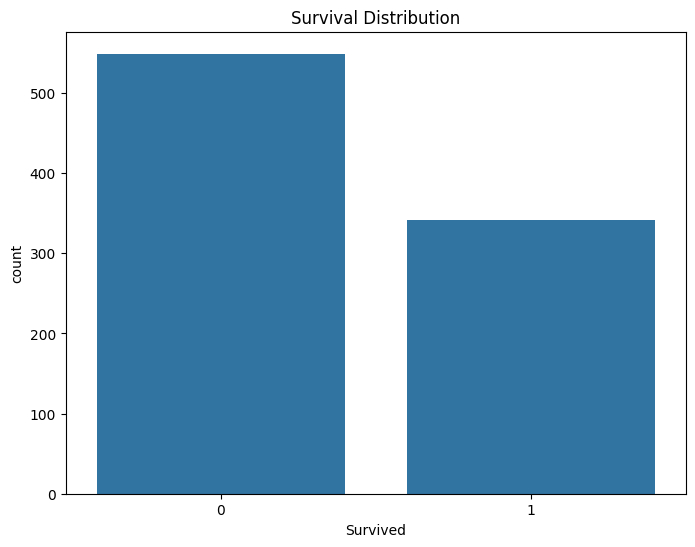

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Survived')
plt.title('Survival Distribution')
plt.show()

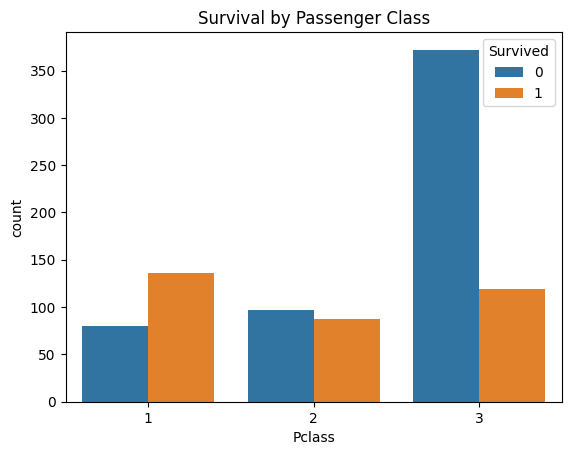

In [ ]:
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.show()

Putem schimba si culoarea prin adaugarea unui parametru de color:)

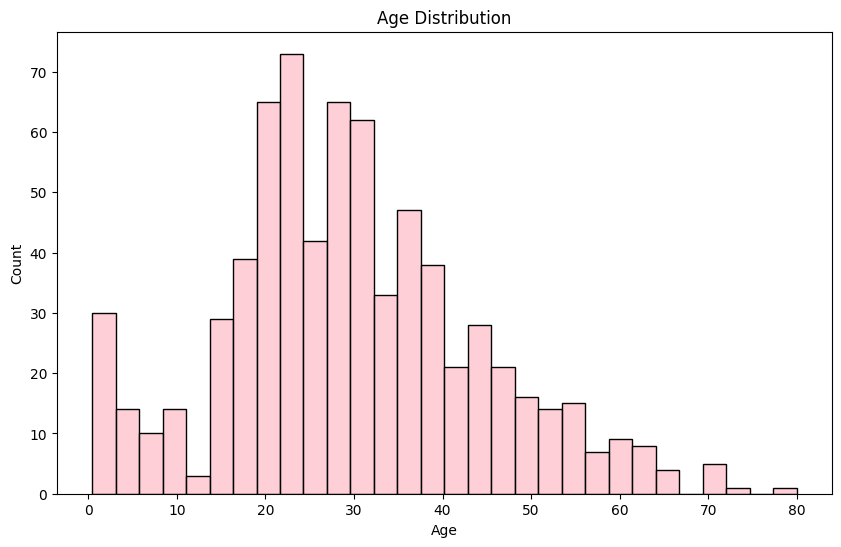

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='Age', bins=30, color="pink")
plt.title('Age Distribution')
plt.show()

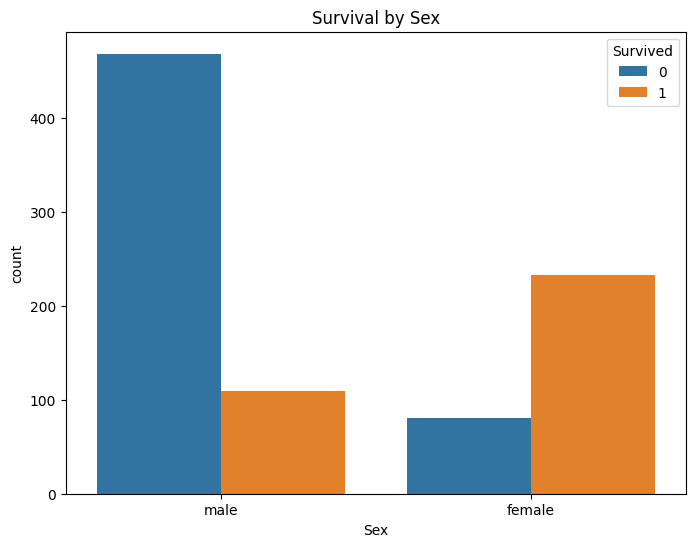

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title('Survival by Sex')
plt.show()

Ne asiguram sa nu avem valori nule

De asemenea, transformam valorile care nu sunt numerice in valori numerice pentru a fi intelese de modelul nostru.

In cazul nostru:

Female - > 0
Male - > 1

In [ ]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)

train_df['Sex'].fillna(train_df['Sex'].mode()[0], inplace=True)
train_df['Sex'] = train_df['Sex'].map({'female': 0, 'male': 1})

features = ['Pclass', 'Sex', 'Age']
X = train_df[features]
y = train_df['Survived']

<ipython-input-10-1b7f211cf80f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
<ipython-input-10-1b7f211cf80f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

Ne impartim datele intr-un set de date de antrenament si unul de validare

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

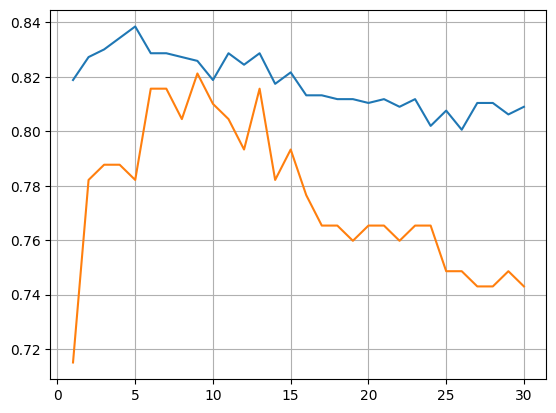

In [ ]:
k_values = range(1, 31)
train_scores = []
test_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

plt.plot(k_values, train_scores, label='Training Accuracy')
plt.plot(k_values, test_scores, label='Testing Accuracy')
plt.grid(True)
plt.show()

In [ ]:
best_k = k_values[np.argmax(test_scores)]
print(f"\nBest k value: {best_k}")


Best k value: 9


In [ ]:
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train_scaled, y_train)

# Make predictions and evaluate
y_pred = final_model.predict(X_test_scaled)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8212290502793296

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [ ]:
passenger_ids = test_data['PassengerId']

test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)
test_data['Sex'].fillna(test_data['Sex'].mode()[0], inplace=True)

test_data['Sex'] = test_data['Sex'].map({'female': 0, 'male': 1})

<ipython-input-16-5c3212fb0c94>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
<ipython-input-16-5c3212fb0c94>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
X_test_submit = test_data[features]
X_test_scaled_submit = scaler.transform(X_test_submit)

predictions = final_model.predict(X_test_scaled_submit)

In [ ]:
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predictions
})

In [ ]:
submission.to_csv('submission.csv', index=False)

print("Submission file shape:", submission.shape)
print("\nFirst few rows of submission file:")
print(submission.head())

Submission file shape: (418, 2)

First few rows of submission file:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


In [ ]:
# Verify submission format
print("\nSubmission file info:")
print(submission.info())
print("\nValue counts in predictions:")
print(submission['Survived'].value_counts())


Submission file info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
None

Value counts in predictions:
Survived
0    268
1    150
Name: count, dtype: int64


# Incheiere

Sper ca v-a placut acest tutorial.
Pe paginile noastre o sa gasiti in continuare informatii despre viitoare cursuri, competiti si evenimente


*   Nitro <br>
https://nitronlp.com/ <br>
https://www.instagram.com/nitro_nlp/

*   AIIS <br>
https://www.aiishow.com/ <br>
https://www.instagram.com/aiis_conference/




